In [30]:
# Matplotlib
import matplotlib.pyplot as plt
# Numpy
import numpy as np
# Pandas
import pandas as pd
# Torch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import pytz
import os
import sys
import glob

scripts_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts'))
sys.path.append(scripts_dir)
from data_generator import normalize_new_data

from datetime import datetime

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
raw_compiled_data = pd.read_csv('../data/final_data/cleaned_compiled_data.csv')
raw_compiled_data['Timestamp'] = pd.to_datetime(raw_compiled_data['Timestamp'])

In [4]:
print(len(raw_compiled_data))
raw_compiled_data.head(5)

221369


,Timestamp,rainfall_S104,rainfall_S107,rainfall_S109,rainfall_S115,rainfall_S116,rainfall_S24,rainfall_S43,rainfall_S50,air_temperature_S104,...,relative_humidity_S50,wind_direction_S104,wind_direction_S107,wind_direction_S109,wind_direction_S115,wind_direction_S116,wind_direction_S24,wind_direction_S43,wind_direction_S50,Lightning_Risk
0,2021-03-01 12:20:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.3,...,58.7,33.0,90.0,102.0,355.0,217.0,351.0,42.0,313.0,False
1,2021-03-01 12:25:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.6,...,58.1,52.0,96.0,105.0,356.0,211.0,358.0,45.0,332.0,False
2,2021-03-01 12:30:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.9,...,58.4,72.0,95.0,97.0,4.0,197.0,23.0,27.0,24.0,False
3,2021-03-01 12:35:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.1,...,53.9,67.0,98.0,85.0,355.0,196.0,37.0,22.0,27.0,False
4,2021-03-01 12:40:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,...,53.2,68.0,98.0,126.0,348.0,202.0,40.0,26.0,335.0,False


In [11]:
data = raw_compiled_data.copy()

data = data.set_index('Timestamp')
full_index = pd.date_range(start=data.index.min(), end=data.index.max(), freq='5min')

data = data.reindex(full_index)

In [12]:
data

,rainfall_S104,rainfall_S107,rainfall_S109,rainfall_S115,rainfall_S116,rainfall_S24,rainfall_S43,rainfall_S50,air_temperature_S104,air_temperature_S107,...,relative_humidity_S50,wind_direction_S104,wind_direction_S107,wind_direction_S109,wind_direction_S115,wind_direction_S116,wind_direction_S24,wind_direction_S43,wind_direction_S50,Lightning_Risk
2021-03-01 12:20:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.3,28.3,...,58.7,33.0,90.0,102.0,355.0,217.0,351.0,42.0,313.0,False
2021-03-01 12:25:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.6,28.3,...,58.1,52.0,96.0,105.0,356.0,211.0,358.0,45.0,332.0,False
2021-03-01 12:30:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.9,28.1,...,58.4,72.0,95.0,97.0,4.0,197.0,23.0,27.0,24.0,False
2021-03-01 12:35:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.1,28.2,...,53.9,67.0,98.0,85.0,355.0,196.0,37.0,22.0,27.0,False
2021-03-01 12:40:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,28.2,...,53.2,68.0,98.0,126.0,348.0,202.0,40.0,26.0,335.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-07 15:55:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-07 16:00:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-07 16:05:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.6,33.7,...,42.2,271.0,260.0,275.0,304.0,238.0,262.0,307.0,275.0,False
2024-12-07 16:10:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.5,33.7,...,40.7,271.0,253.0,277.0,304.0,238.0,262.0,295.0,267.0,False


In [51]:
class SeqToClassLightningDataset(Dataset):
    def __init__(self, compiled_df, timezone_str="Asia/Singapore"):
        self.compiled_df = compiled_df.copy()
        self.timezone = pytz.timezone(timezone_str)
        self.samples = []

        self._prepare_dataset()

    def _prepare_dataset(self):
        # Ensure datetime index
        self.compiled_df["Timestamp"] = pd.to_datetime(self.compiled_df["Timestamp"])
        if not isinstance(self.compiled_df.index, pd.DatetimeIndex):
            self.compiled_df.set_index("Timestamp", inplace=True)
        self.compiled_df.index = self.compiled_df.index.tz_localize(None)

        ## reindex with the min and max
        full_index = pd.date_range(start=self.compiled_df.index.min(), end=self.compiled_df.index.max(), freq='5min')
        self.compiled_df = self.compiled_df.reindex(full_index)

        nan_mask = self.compiled_df.isna()
        gap_id = nan_mask.ne(nan_mask.shift()).cumsum()

        for col in self.compiled_df.columns:
            col_nan_mask = nan_mask[col]
            col_gap_ids = gap_id[col]
            gap_sizes = col_nan_mask.groupby(col_gap_ids).transform('sum')

            to_interpolate = (col_nan_mask) & (gap_sizes <= 24)
            self.compiled_df.loc[~to_interpolate & col_nan_mask, col] = -999999
            self.compiled_df[col] = self.compiled_df[col].interpolate(limit_direction='both')
            self.compiled_df.loc[self.compiled_df[col] == -999999, col] = np.nan
        
        # Prepare input features and drop target
        input_df = self.compiled_df.drop(columns=["Lightning_Risk"])
        input_columns = input_df.columns.values.tolist()

        # Get valid timestamps
        min_ts = self.compiled_df.index.min().ceil("6h") + pd.Timedelta(hours=6)
        max_ts = self.compiled_df.index.max().floor("2h")
        valid_ts = self.compiled_df.loc[
            (self.compiled_df.index >= min_ts) &
            (self.compiled_df.index <= max_ts) &
            (self.compiled_df.index.hour % 2 == 0) &
            (self.compiled_df.index.minute == 0)
        ].index

        for timestamp in valid_ts:
            try:
                # lookback of 6 hours
                input_data = input_df.loc[timestamp - pd.Timedelta(hours=6):timestamp - pd.Timedelta(minutes=5)]

                # Output time windows (future)
                output_times = [timestamp + pd.Timedelta(minutes=delta) for delta in [0, 30, 60, 90, 120]]
                output_data = self.compiled_df.loc[output_times, "Lightning_Risk"]

                if input_data.isna().any().any() or output_data.isna().any().any():
                    continue

                input_data = input_data.values.flatten()
                input_data = input_data.reshape(72, 40)
                output_data = output_data.astype(int).values.flatten()
                
                self.samples.append((input_data, output_data))
            except KeyError:
                continue  # Skip if any timestamps are missing

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        x, y = self.samples[idx]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [52]:
dataset = SeqToClassLightningDataset(raw_compiled_data)
total_len = len(dataset)

train_end = int(0.7 * total_len)
val_end = int(0.85 * total_len)

train_set = torch.utils.data.Subset(dataset, list(range(0, train_end)))
val_set = torch.utils.data.Subset(dataset, list(range(train_end, val_end)))
test_set = torch.utils.data.Subset(dataset, list(range(val_end, total_len)))

C:\Users\ivanc\AppData\Local\Temp\ipykernel_19004\360443625.py:30: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  self.compiled_df[col] = self.compiled_df[col].interpolate(limit_direction='both')


In [53]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

In [54]:
# find the missing time steps in the 5 minute intervals
# get the intervals for a fully filled 5 minute marking for 2023-03-01 to 2024-12-07 (YYYY-MM-DD)

# back fill or interpolate the data

## model that takes in 
class LightningRiskPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_layers=1, dropout=0.2):
        super(LightningRiskPredictor, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers,
                            batch_first=True, dropout=dropout)
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 5)  # 5 future time points
        )

    def forward(self, x):
        # x shape: [batch_size, seq_len, input_dim] (32, 72, 40)
        _, (hn, _) = self.lstm(x)  # Take the last hidden state
        hn = hn[-1]  # [batch_size, hidden_dim] from last LSTM layer
        out = self.fc(hn)  # [batch_size, 5]
        return torch.sigmoid(out)  # Use Sigmoid if you want probabilities

In [55]:
x, y = next(iter(train_loader))

In [56]:
x.shape

torch.Size([32, 72, 40])

In [57]:
y.shape

torch.Size([32, 5])

In [64]:
def train(dataloader, model, num_epochs, learning_rate, val_dataloader, device='cuda'):
    model.to(device)

    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True)

    avg_loss_history = []
    val_acc_history = []

    best_val_acc = 0
    epochs_no_improve = 0
    early_stop_patience = 20
    best_model_state = None

    os.makedirs("models", exist_ok=True)
    timestamp = datetime.now().strftime('%Y_%m_%d_%H_%M')

    for epoch in range(num_epochs):
        total_loss = 0
        model.train()

        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()
            predictions = model(inputs)
            loss = criterion(predictions, targets)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()

        avg_loss = total_loss / len(dataloader)

        # --- Validation ---
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for val_inputs, val_targets in val_dataloader:
                val_inputs, val_targets = val_inputs.to(device), val_targets.to(device)
                val_outputs = model(val_inputs)
                predicted = (val_outputs > 0.5).float()
                correct += (predicted == val_targets).sum().item()
                total += val_targets.numel()
        val_acc = correct / total
        scheduler.step(val_acc)

        if epoch % 5 == 0:
            avg_loss_history.append(avg_loss)
            val_acc_history.append(val_acc)
            print(f"Epoch {epoch+1}/{num_epochs} | Loss: {avg_loss:.4f} | Val Acc: {val_acc:.4f}")

        # --- Early Stopping Logic ---
        # if val_acc > best_val_acc:
        #     best_val_acc = val_acc
        #     best_model_state = model.state_dict()
        #     epochs_no_improve = 0
        # else:
        #     epochs_no_improve += 1
        #     if epochs_no_improve >= early_stop_patience:
        #         print(f"⏹️ Early stopping triggered at epoch {epoch+1} — no improvement in {early_stop_patience} epochs.")
        #         break

        # Save checkpoint every 20 epochs
        if epoch % 20 == 0:
            torch.save(model.state_dict(), f'models/model_{timestamp}_{avg_loss:.6f}_{epoch}.pth')

    # Save best model
    final_model_path = f'models/model_{timestamp}_{best_val_acc:.4f}_best.pth'
    if best_model_state:
        torch.save(best_model_state, final_model_path)
        print(f"✅ Best model saved as {final_model_path}")

    # --- Plot ---
    os.makedirs("plots", exist_ok=True)
    plot_filename = f'loss_plot_{timestamp}.png'
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    axs[0].plot(range(0, len(avg_loss_history) * 5, 5), avg_loss_history, label='Avg Loss (every 5 epochs)')
    axs[0].set_title('Training Loss')
    axs[0].grid(True)

    axs[1].plot(range(0, len(val_acc_history) * 5, 5), val_acc_history, label='Val Accuracy')
    axs[1].set_title('Validation Accuracy')
    axs[1].grid(True)

    plt.savefig(os.path.join("plots", plot_filename))
    print(f"📈 Plot saved as {plot_filename}")
    plt.show()

    return avg_loss_history, val_acc_history

Epoch 1/100 | Loss: 0.2527 | Val Acc: 0.9379
Epoch 6/100 | Loss: 0.2092 | Val Acc: 0.9379
Epoch 11/100 | Loss: 0.2020 | Val Acc: 0.9379
Epoch 16/100 | Loss: 0.1972 | Val Acc: 0.9379
Epoch 21/100 | Loss: 0.1911 | Val Acc: 0.9379
Epoch 26/100 | Loss: 0.1881 | Val Acc: 0.9379
Epoch 31/100 | Loss: 0.1857 | Val Acc: 0.9379
Epoch 36/100 | Loss: 0.1851 | Val Acc: 0.9379
Epoch 41/100 | Loss: 0.1837 | Val Acc: 0.9379
Epoch 46/100 | Loss: 0.1842 | Val Acc: 0.9379
Epoch 51/100 | Loss: 0.1829 | Val Acc: 0.9379
Epoch 56/100 | Loss: 0.1825 | Val Acc: 0.9379
Epoch 61/100 | Loss: 0.1829 | Val Acc: 0.9379
Epoch 66/100 | Loss: 0.1833 | Val Acc: 0.9379
Epoch 71/100 | Loss: 0.1827 | Val Acc: 0.9379
Epoch 76/100 | Loss: 0.1826 | Val Acc: 0.9379
Epoch 81/100 | Loss: 0.1828 | Val Acc: 0.9379
Epoch 86/100 | Loss: 0.1834 | Val Acc: 0.9379
Epoch 91/100 | Loss: 0.1829 | Val Acc: 0.9379
Epoch 96/100 | Loss: 0.1831 | Val Acc: 0.9379
📈 Plot saved as loss_plot_2025_04_18_15_49.png


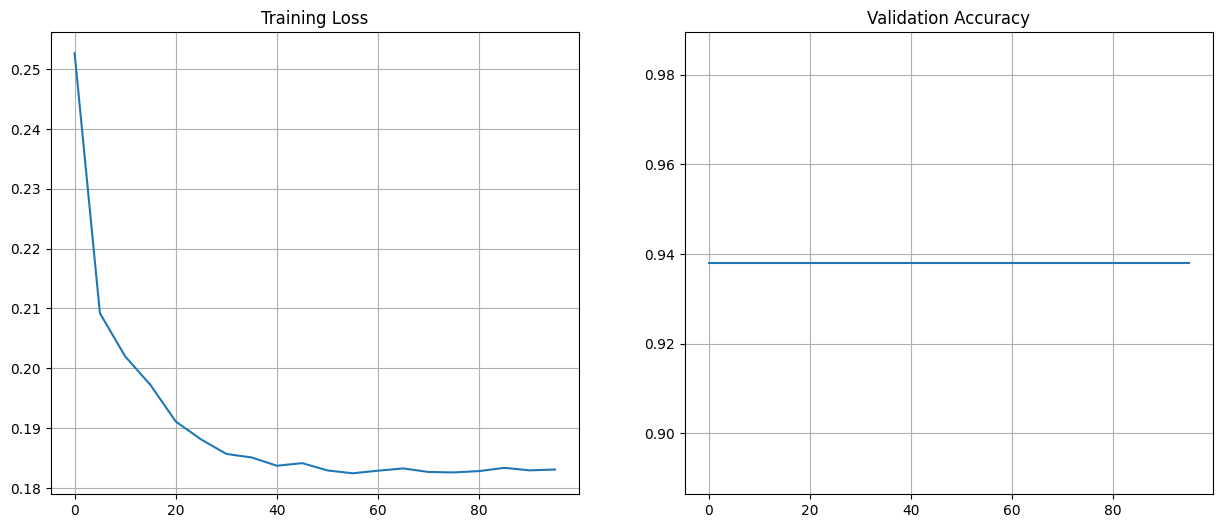

In [65]:
lightning_model = LightningRiskPredictor(40)

train_losses, val_accuracies = train(
    dataloader=train_loader,
    model=lightning_model,
    num_epochs=100,
    learning_rate=1e-3,
    val_dataloader=val_loader,
    device='cuda'
)

